# Pintle Test

- Test proceedure to be migrated over from drive file - 


## Water Testing the pintle

For the water test we need total water mass flow rate of 2.06 lbm/s.  

This will be accomplished using a pressurized tank of water and a metering orifice upstream of the Pintle test.

### Orifice size

The orifice needs to be picked / manufactured, so that at a known pressure difference we have a known mass flow rate of water.

needed variables and conversions:
- water density in slugs/ft^3 => 1.94 (slug / ft^3)
- gravity = 32.2 ft/s^2
- conversion from ft^3 to gal => (7.48 gal/ft^3) 
- conversion from seconds to minutes => (60 s/min)

Calculations for the flow rate in GPM in python script below:

In [1]:
import math

h2o_massflow = 2.06 #lbm/s (pound mass per second)
h2o_density = 1.94 * 32.2 #lbm/ft^3
ft3_to_gal = 7.48 # gal / ft^3

h2o_volume_flow = (1/h2o_density * ft3_to_gal * 60) * h2o_massflow  

#print("Feet to gallons,              ft3_to_gal           = %.2f lbm/ft^3" % ft3_to_gal)
print("Water density,                h2o_density          = %.2f lbm/ft^3" % h2o_density)
print("Water flow rate in gal/min,   h2o_volume_flow      = %.2f gal/min" % h2o_volume_flow)


Water density,                h2o_density          = 62.47 lbm/ft^3
Water flow rate in gal/min,   h2o_volume_flow      = 14.80 gal/min


Currently have a .125 diameter orifice with a $C_v$ of 0.370. The data graphed below is based on the manufacturer's data table for a calibrated 0.125 in orifice:

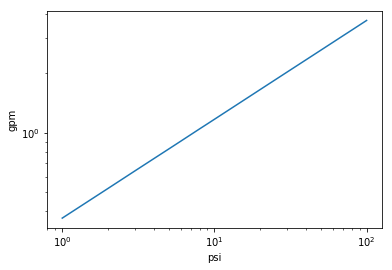

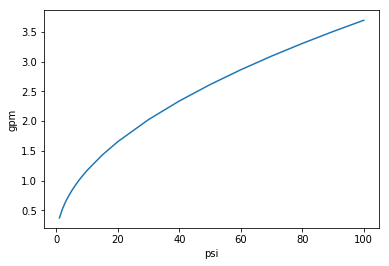

In [7]:
import numpy
import math
from mpmath import *
from matplotlib import pyplot as plt

gpm = [0.370, 0.523, 0.641, 0.740, 0.827, 0.906, 0.979, 1.047, 1.110, 1.170, 1.433,
       1.655, 2.027, 2.340, 2.616, 2.866, 3.096, 3.309, 3.510, 3.70]

psi = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.plot(psi, gpm)
plt.xlabel('psi')
plt.ylabel('gpm')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(psi, gpm)
plt.xlabel('psi')
plt.ylabel('gpm')
plt.show()



### note: 
The 0.125 in orifice is too small, but it is clear from the data that a larger orifice will have a certain amount of leeway on the diameter of the orifice which will give us the needed flow rate. The supply pressure (in our case the pressure drop across the orifice) can be adjusted to give the needed flow rate. 

## Manufacturer's equations

For sizing an unkown orifice diameter with a known required flow rate:

eq (1) : $d_L = \left(\frac{1}{22.5}\frac{Q_L}{\sqrt{\Delta P}}\right)^{1/2}$ 

eq (2) : $C_{vl} = \frac{Q}{\sqrt{\Delta P}}$

Volume flow rate for known $C_{v}$ and $\Delta P$

eq (3) : $Q = C_{v}\sqrt{\Delta P}$






In [3]:
# Required pressure for a 14.8 gpm using the 0.125 in orifice

cv_125 = 0.370   # Flow factor for 0.125 in diameter orifice per manufacturer's specs

pressure_drop = (h2o_volume_flow/cv_125)**2

print("Pressure drop needed for 14.8 gpm with 0.125 in orifice %.2f " % pressure_drop)

Pressure drop needed for 14.8 gpm with 0.125 in orifice 1600.01 


Add some text regarding calculating the theoretical orifice size

In [4]:

# Guess and check to find a reasonable pressure range and coresponding drill 
delta_pressure = 69.5

orifice = sqrt(1/22.5) * (h2o_volume_flow / (delta_pressure)**(1/2))

print('Theoretical orifice size for 14.8 gpm =  %.5f inches' % orifice)

print('Nearest standard drill size = 3/8th in (0.375)' )

Theoretical orifice size for 14.8 gpm =  0.37426 inches
Nearest standard drill size = 3/8th in (0.375)


To experimentally determine the flow coefficient $C_v$ we will need to determine the flow rate through the orifice at 1 psi. We can then use equation (2) from the manufaturer (listed above) 



In [5]:
# Water heigh needed for 1 psi

import math

h2o_specific_weight = 62.4    #lbf/ft^3
needed_psi =1                 # need 1 psi for the experiment
g = 32.2                      # standard gravity ft/s^2


height_ft = (needed_psi * 144) / (h2o_specific_weight) #(lbf/in^2)*(in^2/ft^2) / lbf/ft^3 -> ft
height = height_ft * 12

print('Height of water needed for 1 psi           = %.3f in' % height )

# estimated minimum amount of water expected through orifice at 1 psi:

est_cv = (h2o_volume_flow) / (delta_pressure)**(1/2)

est_h2o = est_cv * (needed_psi)**(1/2)

print('Estimated volume of water for experiment   = %.3f gallons/min' % est_h2o )


Height of water needed for 1 psi           = 27.692 in
Estimated volume of water for experiment   = 1.775 gallons/min


Flow coefficient for 0.375 in is 3.557611
Flow coefficient for no orifice in is 5.800982
Flow coefficient for 0.125 in is 0.211560
Difference between ideal 0.125 and experiment is 0.158440

Pressure drop needed for 14.8 gpm with 0.375 inch orifice 18.96 


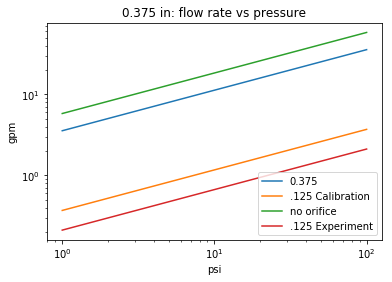

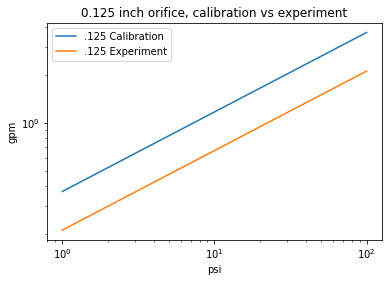

In [5]:
import csv
import numpy
from mpmath import *
from matplotlib import pyplot as plt

# import the data from the Orifice Experiment csv file
    
with open ('ORIFICE_EXPERIMENT.csv', newline='') as f:
    reader = csv.reader(f)
    x = list(reader)
    result = numpy.array(x).astype("str")
    
    # Slicing out the times for each of the three experiments where the trailing number indicates which experiment it belongs to:
    # 1 : 0.375 in orivice - this orifice was machined and needs to have the flow coefficient experimentally determined
    # 2 : no orifice - 5 test runs were performed without an orifice to help determine the affect of the pipe, valve, etc
            # on the experiment
    # 3 : 0.125 in orifice: this orifice was not modified from the manufacturer and was used as a control. 
    
    times = result[:,1]
    time1 = numpy.array(times[1:6]).astype("float")
    time2 = numpy.array(times[7:12]).astype("float")
    time3 = numpy.array(times[13:18]).astype("float")

    weight = result[:,3]
    weight1 = numpy.array(weight[1:6]).astype("float")
    weight2 = numpy.array(weight[7:12]).astype("float")
    weight3 = numpy.array(weight[13:18]).astype("float")
    
    # finding the average time and weight recorded for each of the experiments.
    
    t_ave_1 = numpy.mean(time1)
    t_ave_2 = numpy.mean(time2)
    t_ave_3 = numpy.mean(time3)
    
    wt_avg_1 = numpy.mean(weight1)
    wt_avg_2 = numpy.mean(weight2)
    wt_avg_3 = numpy.mean(weight3)
    
    
    # Conversions and data used for calculations
    # Average water temp from the experiments was 72 F, 
    # Water density interpolated between 62.4 at 32 F and 62.1 at 90 F
    
    density = 62.19 # lbf/ft^3 
    ft3_to_gal = 7.48 #  gal / ft^3 conversion
    weight_per_gal = density / ft3_to_gal

    
    # calculating the flow rate for each of the experiments, units of gal / minute (using 1/60 to convert seconds to min)
     
    flow1 = (wt_avg_1 / weight_per_gal)/(t_ave_1/60) 
    flow2 = (wt_avg_2 / weight_per_gal)/(t_ave_2/60)
    flow3 = (wt_avg_3 / weight_per_gal)/(t_ave_3/60)
    flow4 = (2.76 / weight_per_gal)/(t_ave_3/60)

    delta_cl = 0.370 - flow3
    
    print ('Flow coefficient for 0.375 in is %.6f' % flow1)
    print ('Flow coefficient for no orifice in is %.6f' % flow2)
    print ('Flow coefficient for 0.125 in is %.6f' % flow3)
    print ('Difference between ideal 0.125 and experiment is %.6f' % delta_cl)

    pressure_drop = (14.8/(flow1 - delta_cl))**2
 
    print ()
    print("Pressure drop needed for 14.8 gpm with 0.375 inch orifice %.2f " % pressure_drop)
    
# some graphs

psi = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
gpm = []
gpm1 = []
gpm2 = []
gpm3 = []

for n in psi:
    gpm.append(0.37 * (n)**(1/2)) # manufacturer's spec for 0.125 in orifice
    gpm1.append(flow1 * (n)**(1/2)) # 
    gpm2.append(flow2 * (n)**(1/2))
    gpm3.append(flow3 * (n)**(1/2))
    
    
    
plt.plot(psi, gpm1, label = '0.375')
plt.plot(psi, gpm, label = '.125 Calibration')
plt.plot(psi, gpm2, label = 'no orifice')
plt.plot(psi, gpm3, label = '.125 Experiment')
plt.title('0.375 in: flow rate vs pressure')
plt.xlabel('psi')
plt.ylabel('gpm')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
    
plt.plot(psi, gpm, label = '.125 Calibration')
plt.plot(psi, gpm3, label = '.125 Experiment')
plt.title('0.125 inch orifice, calibration vs experiment')
plt.xlabel('psi')
plt.ylabel('gpm')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

